In [53]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.misc import derivative
import scipy.integrate as integrate
import pandas as pd

##Lucys quartic kernel

$$W(R,h)=\alpha_{D}\left\lbrace\begin{array}{c}(1+3q)(1-q)^{3}~~~~~0\leq q\leq h \\ 0~otros~casos \end{array}\right\rbrace$$

donde: $q=\frac{|\vec{r}-\vec{r'}|}{h}$

en 2D: $\alpha_{D}=\frac{5}{\pi h^{2}}$

en 3D: $\alpha_{D}=\frac{105}{16 \pi h^{3}}$

In [10]:
def kl(q):
  T1=5/(np.pi*(h**2))
  T2=(1+3*q)
  T3=(1-q)**3
  return T1*T2*T3 if 0<=q<h else 0




In [19]:
q=np.linspace(0,1,100)
h=2

In [20]:
W=[kl(qi) for qi in q]


In [21]:
w=np.array(W)

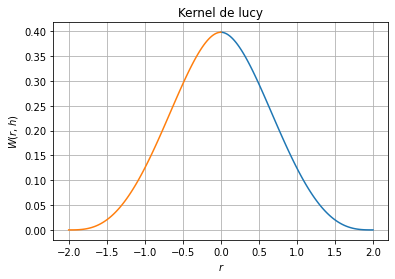

In [22]:
plt.figure()
plt.plot(q*h,w)
plt.plot(-q*h,w)
plt.xlabel("$r$")
plt.ylabel("$W(r,h)$")
plt.title("Kernel de lucy")
plt.grid()
plt.show()


2. calculamos la derivada numerica

Simbolicamente

In [23]:
q1=sp.symbols("q")
y=(1+3*q1)*(1-q1)**3


In [24]:
yp=sp.diff(y,q1,1)

In [25]:
yp

3*(1 - q)**3 - 3*(1 - q)**2*(3*q + 1)

In [26]:
ypev=sp.lambdify(q1,yp,"numpy")
q_=np.linspace(0,1,100)

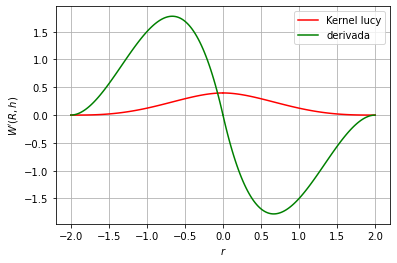

In [27]:
plt.figure()
plt.plot(q_*h,W,"r",label="Kernel lucy")
plt.plot(-q_*h,W,"r")
plt.plot(q_*h,ypev(q_),"g",label="derivada")
plt.plot(-q_*h,-ypev(q_),"g")
plt.xlabel("$r$")
plt.ylabel("$W'(R,h)$")
plt.grid()
plt.legend()
plt.show()

## Integrales

$$\int_0^{\pi}e^{1-\sqrt{x}}$$

In [28]:
def f1(x):
  return np.exp(1-np.sqrt(x))
  

In [29]:
x=np.linspace(0,np.pi,100)
print(f"La integral por el metodo del trapecio es: {integrate.trapz(f1(x),x)}")
print(f"La integral por el metodo de simpson es: {integrate.simps(f1(x),x)}")
print(f"La integral por el metodo de cuadratura es:{integrate.quad(f1,0,np.pi)[0]}")

La integral por el metodo del trapecio es: 2.8785626387091496
La integral por el metodo de simpson es: 2.877400706092263
La integral por el metodo de cuadratura es:2.8754911354375863


$$\int_0^{\frac{\pi}{2}}\frac{1}{\sqrt{tan(x)}}dx$$

In [30]:
def f2(x):
  return 1/np.sqrt(np.tan(x))

In [31]:
x=np.linspace(0.000000001,np.pi/2,100000)
print(f"La integral por el metodo del trapecio es: {integrate.trapz(f2(x),x)}")
print(f"La integral por el metodo de simpson es: {integrate.simps(f2(x),x)}")
print(f"La integral por el metodo de cuadratura es:{integrate.quad(f2,0,np.pi/2)[0]}")

La integral por el metodo del trapecio es: 2.4640204249102537
La integral por el metodo de simpson es: 2.4229561668187714
La integral por el metodo de cuadratura es:2.2214414690792026


$$\int_{-\infty}^{\infty}\frac{1}{1+x^{2}}$$

In [32]:
def f3(x):
  return 1/(1+x**2)

In [34]:
x=np.linspace(-1000,1000,100000)
print(f"La integral por el metodo del trapecio es: {integrate.trapz(f3(x), x,)}")
print(f"La integral por el metodo de simpson es: {integrate.simps(f3(x),x)}")
print(f"La integral por el metodo de cuadratura es:{integrate.quad(f3,-np.infty,np.infty)[0]}")

La integral por el metodo del trapecio es: 3.139592654256327
La integral por el metodo de simpson es: 3.13959265425646
La integral por el metodo de cuadratura es:3.141592653589793


$$\int_0^{\frac{\pi}{4}}\int_{sinx}^{cosx}(2ysin(x)+cos^{2}x)dxdy=\int_0^{\frac{\pi}{4}}(cos^{3}x-sin^{3}x)dx$$

In [36]:
def f4(x):
  return np.cos(x)**3-np.sin(x)**3

In [37]:
x=np.linspace(0,np.pi/4,1000)
print(f"La integral por el metodo del trapecio es: {integrate.trapz(f4(x), x)}")
print(f"La integral por el metodo de simpson es: {integrate.simps(f4(x),x)}")
print(f"La integral por el metodo de cuadratura es:{integrate.quad(f4,0,np.pi/4)[0]}")

La integral por el metodo del trapecio es: 0.5118445260477336
La integral por el metodo de simpson es: 0.5118446352500744
La integral por el metodo de cuadratura es:0.5118446353109126


$$\int_{e}^{2e}\frac{1}{ln(x)}dx$$

In [38]:
def f5(x):
  return 1/np.log(x)

In [39]:
x=np.linspace(np.e,2*np.e,1000)
print(f"La integral por el metodo del trapecio es: {integrate.trapz(f5(x), x)}")
print(f"La integral por el metodo de simpson es: {integrate.simps(f5(x),x)}")
print(f"La integral por el metodo de cuadratura es:{integrate.quad(f5,np.e,2*np.e)[0]}")

La integral por el metodo del trapecio es: 2.003810749013251
La integral por el metodo de simpson es: 2.0038105619858713
La integral por el metodo de cuadratura es:2.0038105616240243


Velocidad de escape

In [40]:
#calculemos primero la integral:

def g(z):
  return 1/z**2

In [43]:
iq=integrate.quad(g,1,np.infty)[0]

In [46]:
iq

1.0

Entonces: $v^{2}=2gR\int_1^{\infty}z^{-2}dz=2gR$ por lo que la velocidad de escape es:




In [45]:
R=6.38E6
g=9.8
print(f"la velocidad de escape es:{np.sqrt(2*g*R)}")

la velocidad de escape es:11182.48630672088


##6

In [47]:
def e(t):
  return np.e**-t

In [51]:
def N(x):
  x1=np.linspace(0,x,1000)
  return [integrate.quad(e,0,x)[0],integrate.simps(e(x1),x1), integrate.trapz(e(x1),x1)]

In [52]:
N(1)

[0.6321205588285578, 0.6321205588857143, 0.6321206116107817]

In [70]:
et=(abs(N(2)[2]-(1-np.e**-2)))/(1-np.e**-2)

In [75]:
es=(abs(N(2)[1]-(1-np.e**-2)))/(1-np.e**-2)

In [74]:
eg=(abs(N(2)[0]-(1-np.e**-2)))/(1-np.e**-2)

In [76]:
def error(t):
  et=(abs(N(t)[2]-(1-np.e**-t)))/(1-np.e**-t)
  es=(abs(N(t)[1]-(1-np.e**-t)))/(1-np.e**-t)
  eg=(abs(N(t)[0]-(1-np.e**-t)))/(1-np.e**-t)
  return [et,es,eg]

In [77]:
error(2)

[3.340009791634099e-07, 4.387488452503776e-10, 1.2839925153658901e-16]

In [78]:
error(10)

[8.3500110888332e-06, 4.164266984344467e-08, 2.2205468619218786e-16]

In [79]:
error(20)

[3.3399877022230585e-05, 3.318922158392526e-07, 2.2204460538269937e-16]

In [80]:
error(40)

[0.0001335968308568969, 2.635769378311892e-06, 2.220446049250313e-16]

In [81]:
error(80)

[0.0005343444938412656, 2.078043722120171e-05, 2.220446049250313e-16]

In [82]:
error(160)

[0.002136693094097364, 0.00016148215528111187, 2.220446049250313e-16]

6.2

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |3.34$\times 10^{-7}$|4.38$\times 10^{-10}$|1.28$\times 10^{-16}$|
|   10  |8.35$\times 10^{-6}$|4.16$\times 10^{-8}$|2.22$\times 10^{-16}$|
|20|3.34$\times 10^{-5}$|3.31$\times 10^{-7}$|2.22$\times 10^{-16}$|
|40|0.0001|2.634$\times 10^{-6}$|2.22$\times 10^{-16}$|
|80|0.0005|2.078$\times 10^{-5}$|2.22$\times 10^{-16}$|
|160|0.002|0.00016|2.22$\times 10^{-16}$|

In [84]:
df=pd.DataFrame({"N":[2,10,20,40,80,160],"Et":[3.34E-7,8.35E-6,3.34E-5,0.0001,0.0005,0.002],"Es":[4.38E-10,4.16E-8,3.31E-7,2.634E-6,2.079E-5,0.00016],"Eg":[1.28E-16,1.28E-16,1.28E-16,1.28E-16,1.28E-16,1.28E-16]})

In [85]:
df

,N,Et,Es,Eg
0,2,3.340000e-07,4.380000e-10,1.280000e-16
1,10,8.350000e-06,4.160000e-08,1.280000e-16
2,20,3.340000e-05,3.310000e-07,1.280000e-16
3,40,1.000000e-04,2.634000e-06,1.280000e-16
4,80,5.000000e-04,2.079000e-05,1.280000e-16
5,160,2.000000e-03,1.600000e-04,1.280000e-16


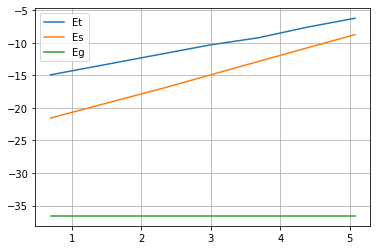

In [87]:
plt.figure()
plt.plot(np.log(df.N),np.log(df.Et),label="Et")
plt.plot(np.log(df.N),np.log(df.Es),label="Es")
plt.plot(np.log(df.N),np.log(df.Eg),label="Eg")
plt.legend()
plt.grid()
plt.show()

